<a href="https://colab.research.google.com/github/Kae1thas/ML-24/blob/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_4_%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


# Считываем файл в DataFrame



метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

## Логистическая регрессия

Один из самых простых методов классификации — это логистическая регрессия. По существу, модель логистической регрессии представляет собой аналог линейной регрессии. Однако, если в случае линейной регрессии мы хотели провести линию через наши данные, то в случае логистической регрессии мы стремимся провести линию между двумя классами наших данных. Технически это сводится к тому, что введем функцию принятия решений для результата сопоставления наших данных и построенной линии.
Это можно описать как следующую модель:
$$ \hat{y}_i = \sigma \left(\sum_{j=0}^p w_jX_{ij}\right) \equiv \sigma \left(\sum_{j=1}^p w_jX_{ij}+b\right), $$
где <ul>
<li> $\sigma$ - функция принятия решений - функция активации;
<li> $ \hat{y}_i$ - результат принятия решений - класс экземпляра данных.
    </ul>
Из некоторых статистических выводов известно, что для такой модели необходимо выбрать функцию потерь следующего вида:
$$ L = -\frac{1}{n}\sum_{i=0}^{n-1}{y_i \log{\hat{y}_i}+(1-y_i)\log{(1-\hat{y}_i)}}$$

и следующий вид функции активации:
$$\sigma(z_i) = \frac{1}{1+\exp(-z_i)}, $$
где <ul>
    <li> $z_i = \sum_{j=0}^p w_jX_{ij} = X_iW^T$ ;
     <li> тогда $\hat{y}_i =\sigma(X_iW^T) $.   </ul>
         
прежде чем записать выражение для градиента функции потерь запишем выражение для производной функции активации
$$ \sigma'(z_i) = \frac{\partial \sigma(z_i)}{\partial z_i} = (1-\sigma(z_i))\sigma(z_i) $$
Градиент функции потерь для одного элемента выборки может быть выражен следующим образом:
$$
\nabla_W L_i =
-{
\left(\frac{y_i}{\sigma(X_iW^T)}-\frac{1-y_i}{1-\sigma(X_iW^T)}\right)\sigma'(X_iW^T)\odot X_i
= -\left(y_i - \sigma(X_iW^T) \right)\odot X_i = -\left(y_i - \hat{y}_i\right)\odot X_i
}
$$
Тогда правило обновления весовых параметров может быть записано как
$$ W^t = W^{t-1} - \eta\frac{1}{n}\sum_{i=0}^{n-1}\left(  \hat{y}_i -y_i\right )\odot X_i.$$
Отметим, что данное выражение эквиваленто записанному для логистической регрессии с точностью до коэффициента $2$, поэтому мы учтем данный параметр путем замены $\eta \to \eta/2$.
<br>





рассмотрим графики функции активации сигмоид и ее производной

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

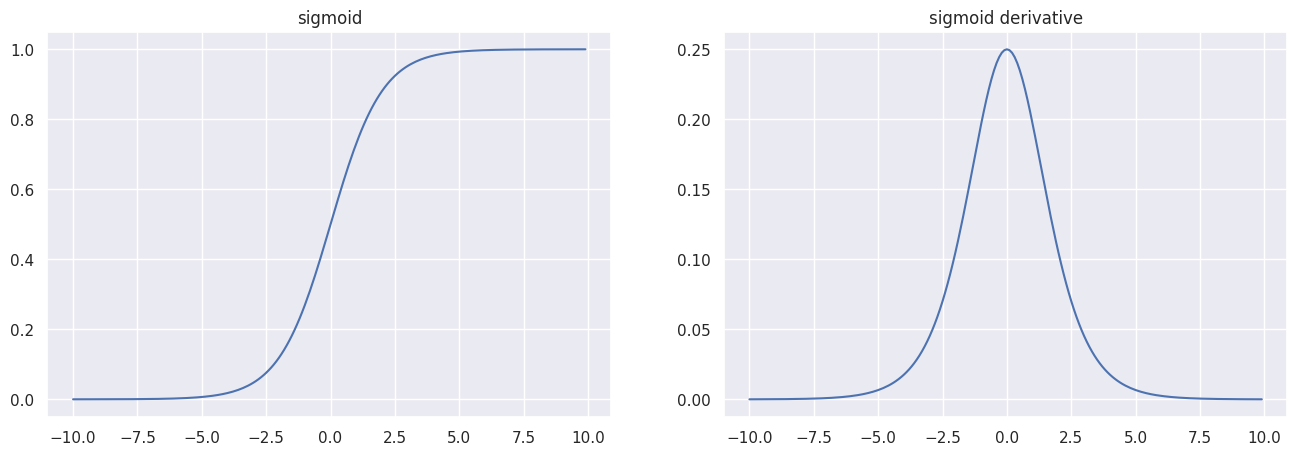

In [ ]:
z = np.arange(-10,10,0.1)

plt.figure(figsize=(16,5))
plt.subplot(121); plt.plot(z,sigmoid(z)); plt.title('sigmoid')
plt.subplot(122); plt.plot(z,sigmoid_derivative(z)); plt.title('sigmoid derivative')
plt.show()

Как правило, после расчета функции активации мы должны округлить значения до 0 или до 1. То есть до значения метки одного из классов. Такое округление можно сделать по заданному порогу результатов функции активации. Например, мы можем сказать, что если значение сигмоида больше 0.5 то пусть будет класс 1, а если меньше, то наоборот.

Однако, на практике иногда ставят высокий порог, 0.7 - 0.8.

Запишем функцию определения класса.

Отметим, что в описанном смысле можно говорить о том, что результат сигмоида - это вероятность того, что аргумент функции (z) принадлежит одному из классов. Также отметим, что такой аргумент принято называть логит.



In [ ]:
def to_class(logit, threshold = 0.5):
    return (logit>=threshold)*1

In [ ]:
print( to_class(sigmoid(2.5), threshold = 0.7), ',',  to_class(sigmoid(-2.5), threshold = 0.7) )

1 , 0


Отметим, что для расчета функции потерь не следует пользоваться округлением до классов

Теперь рассмотрим функцию потерь. Отметим, что значениях логорифма мы ввели небольшую константу с целью исключить ошибку вида логорифм нуля.

In [ ]:
_EPS_ = 1e-6
def loss(yhat, y):
    return -(y*np.log(yhat + _EPS_)+(1 - y)*np.log(1 - yhat + _EPS_)).mean()

для начала рассмотрим значение функции активации для предельных случаев значений вероятности.

In [ ]:
print('неопределенность (yhat=0.5, y=1):\t %.3f'%loss(yhat=0.5, y=1))
print('неопределенность (yhat=0.5, y=0):\t %.3f'%loss(yhat=0.5, y=0))
print('уверенный 0 класс (yhat=0, y=0):\t %.3f'%loss(yhat=0.0, y=0))
print('уверенный 1 класс(yhat=1, y=1):\t %.3f'%loss(yhat=1, y=1))
print('ошибочный 0 класс (yhat=0, y=1):\t %.3f'%loss(yhat=0.0, y=1))
print('ошибочный 1 класс(yhat=1, y=0):\t %.3f'%loss(yhat=1, y=0))

неопределенность (yhat=0.5, y=1):	 0.693
неопределенность (yhat=0.5, y=0):	 0.693
уверенный 0 класс (yhat=0, y=0):	 -0.000
уверенный 1 класс(yhat=1, y=1):	 -0.000
ошибочный 0 класс (yhat=0, y=1):	 13.816
ошибочный 1 класс(yhat=1, y=0):	 13.816


Запишем все в один класс. Также добавим в функцию эластичную регуляризацию.

In [ ]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)

    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            x_batch   = self.add_bias(X)
            y_batch   = y

        for i in range(self.epochs):

            if self.batch_size:
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch)
            self.weights = self.update()
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]

    #---------------------------------
    def plot_cost(self, figsize = (12,6)):
        plt.figure(figsize = figsize)
        plt.plot(self.cost,'-*')
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [ ]:
class ElasticRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + self.l1_penalty + l2_term)

In [ ]:
_EPS_ = 1e-6

class LogisticRegression(ElasticRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 threshold = 0.5,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state,
                         l1_penalty = l1_penalty,
                         l2_penalty = l2_penalty)
        self.learning_rate = learning_rate/2
        self.threshold = threshold

    #---------------------------------
    def loss(self,yhat, y):

        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size

        return -(y*np.log(yhat  + _EPS_)+(1 - y)*np.log(1 - yhat  + _EPS_)).mean()\
            + l1_term+ l2_term

    #---------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    #---------------------------------
    def forward(self, X):
        return self.sigmoid(self.weights.dot(X.T))

    #---------------------------------
    def to_class(self,logit):
        return (logit>=self.threshold)*1

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))

        if self.threshold:
            return self.to_class(yhat)
        else:
            return yhat
    #---------------------------------
    def score(self, X, y):
        yhat  = self.predict(X)
        return sum((yhat==y)*1)/y.size

    #---------------------------------
    def classification_report(self, X,y):
        tp = 0 # true_positives
        tn = 0 # true_negatives
        fp = 0 # false_positives
        fn = 0 # false_negatives

        yhat  = self.predict(X)
        total = yhat.size

        for yhati,yi in zip(yhat,y):
            if yi == 1 and yhati == 1:
                tp += 1
            elif yi == 0 and yhati == 0:
                tn += 1
            elif yi == 1 and yhati == 0:
                fn += 1
            elif yi == 0 and yhati == 1:
                fp += 1

        print('True Positives:%.0f'%(tp), end = '\t')
        print('False Positives:%.0f'%(fp))
        print('False Negatives:%.0f'%(fn), end = '\t')
        print('True Negatives:%.0f'%(tn))

        print('Accuracy:%.4f'% ((tp + tn) / total))
        print('Recall:%.4f'% (tp / (tp + fn)), end = '\t')
        print('Precision:%.4f'%(tp / (tp + fp)))
        print('f1 measure:%.4f'%(tp / (tp + 0.5*(fp+fn))))

Запишим данные для классификации.

In [ ]:
X = df[num_columns].values
y = df["Transmission"].values
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
pd.DataFrame(X_train).tail()

,0,1,2,3,4
22446,0.64,0.479896,0.353333,0.046092,0.251134
22447,0.74,0.465893,0.479167,0.077144,0.331520
22448,0.70,0.572360,0.333333,0.058106,0.356492
22449,0.70,0.581916,0.375000,0.046593,0.362475
22450,0.24,0.579916,0.000000,0.008016,0.147012


Проведем тестирование без регуляризации

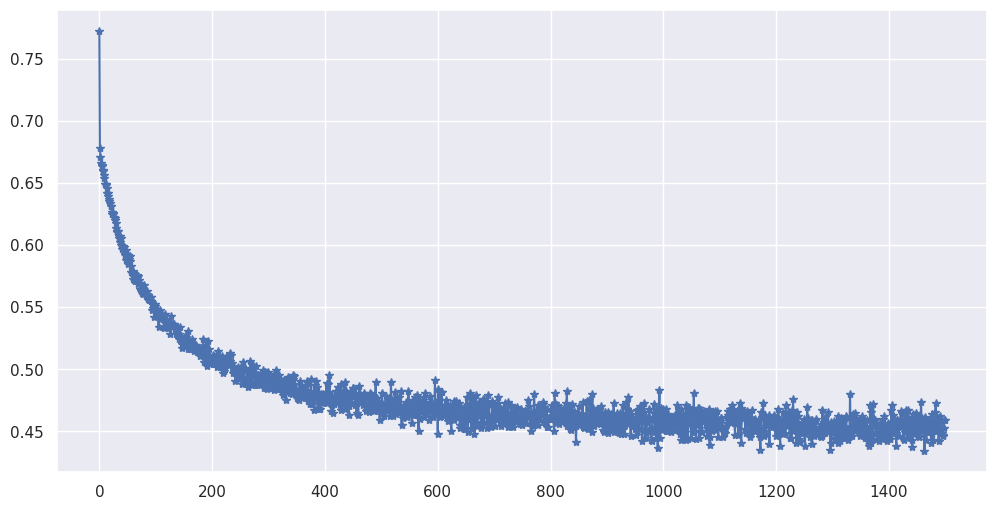

train Accuracy: 0.8040; test Accuracy: 0.8112
True Positives:3283	False Positives:730
False Negatives:1087	True Negatives:4523
Accuracy:0.8112
Recall:0.7513	Precision:0.8181
f1 measure:0.7833


In [ ]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

Посмотрим веса

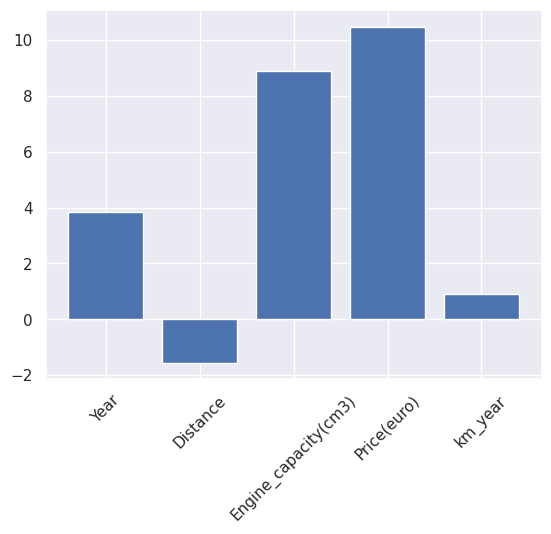

In [ ]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Проведем тест с регуляризацией L2

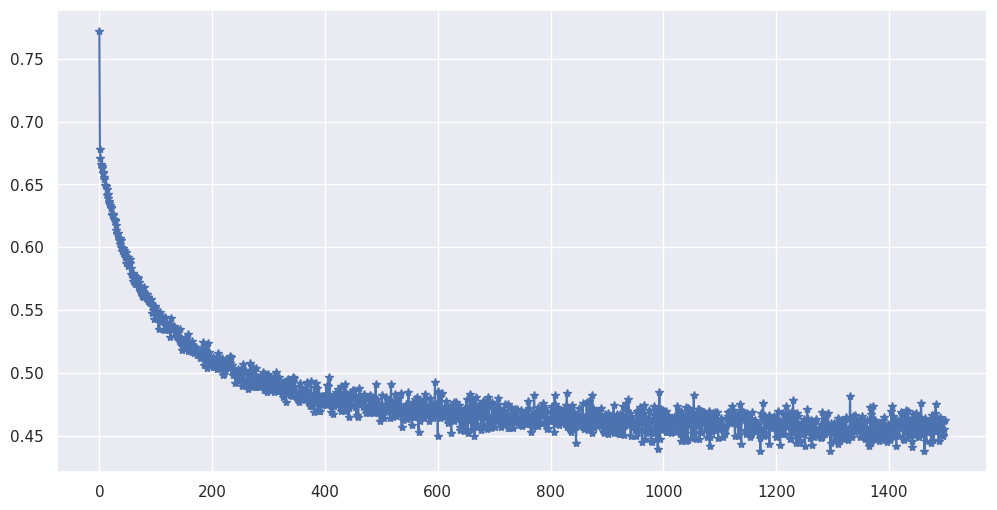

train Accuracy: 0.8034; test Accuracy: 0.8112
True Positives:3270	False Positives:717
False Negatives:1100	True Negatives:4536
Accuracy:0.8112
Recall:0.7483	Precision:0.8202
f1 measure:0.7826


In [ ]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l2_penalty = 0.0001)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

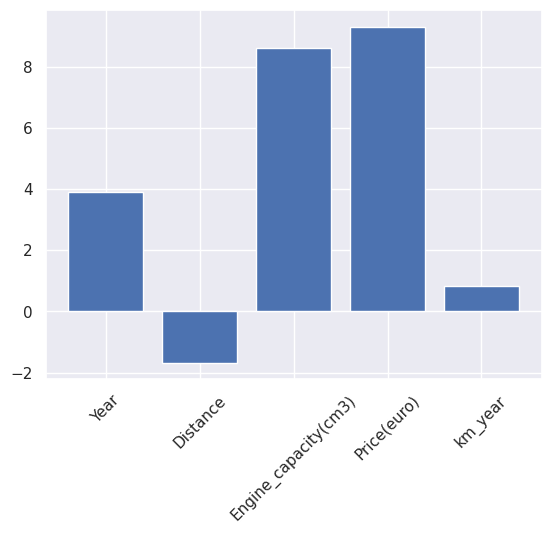

In [ ]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Проведем тест с L1 регуляризацией

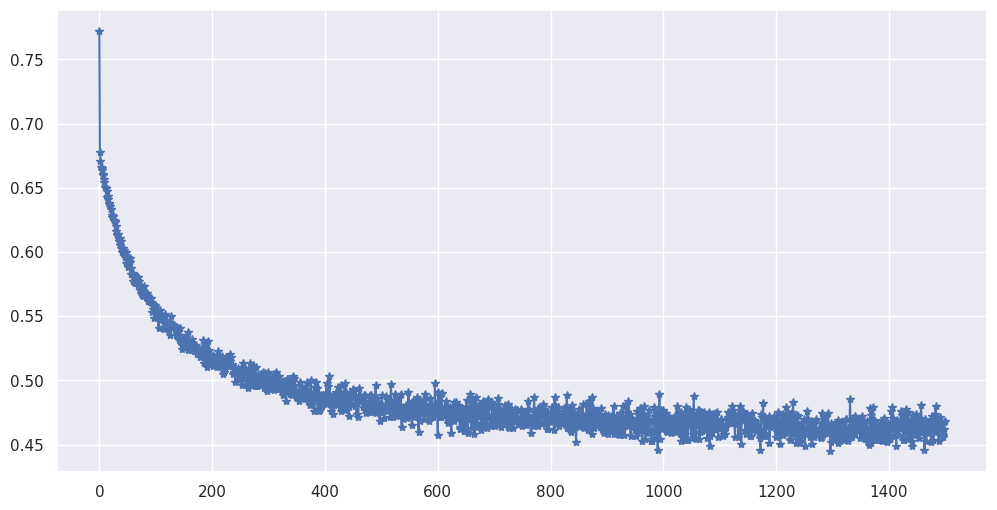

train Accuracy: 0.8003; test Accuracy: 0.8080
True Positives:3256	False Positives:734
False Negatives:1114	True Negatives:4519
Accuracy:0.8080
Recall:0.7451	Precision:0.8160
f1 measure:0.7789


In [ ]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l1_penalty = 0.005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

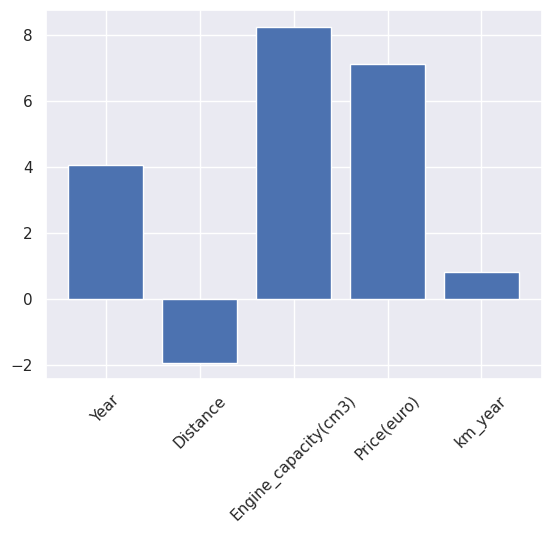

In [ ]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Эластичная регрессия

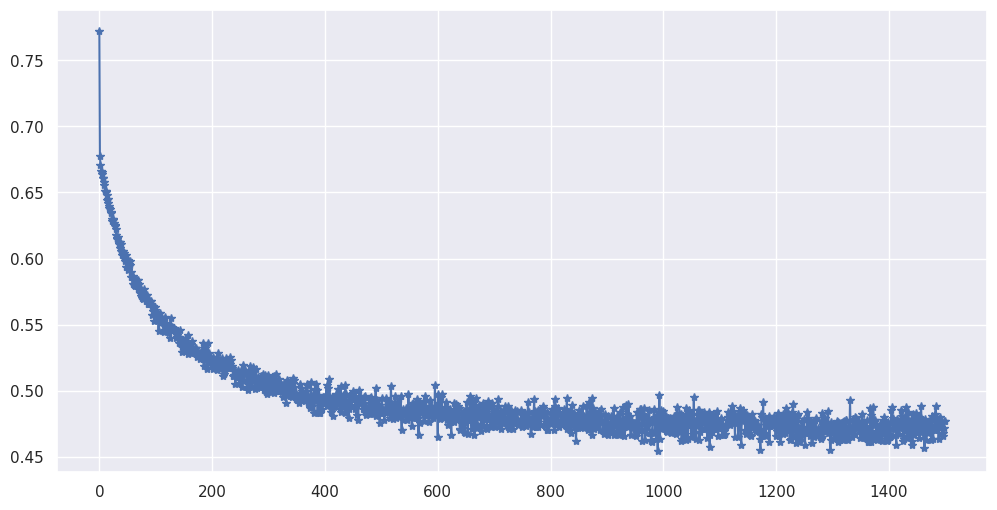

train Accuracy: 0.7950; test Accuracy: 0.8042
True Positives:3244	False Positives:758
False Negatives:1126	True Negatives:4495
Accuracy:0.8042
Recall:0.7423	Precision:0.8106
f1 measure:0.7750


In [ ]:
regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000, l1_penalty = 0.008, l2_penalty = 0.00005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

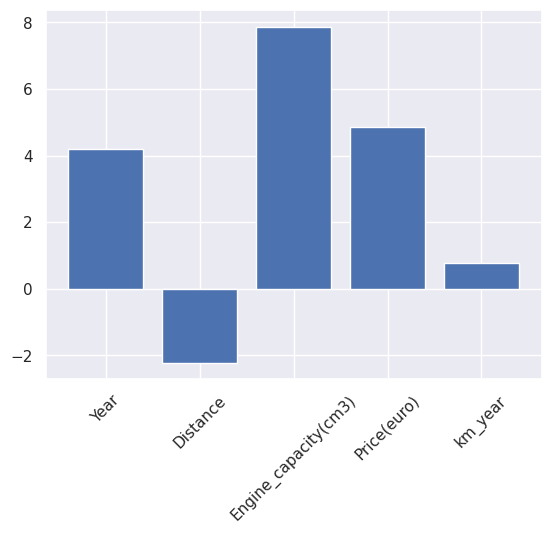

In [ ]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Посмотрим, можно ли проводить классификацию без параметров связанных с расстоянием

In [ ]:
w, b = regr.get_w_and_b()

w[1] = 0
w[-1] = 0

regr = LogisticRegression(learning_rate=0.8,
                          epochs=1500,
                          batch_size=5000,
                          l1_penalty = 0.005,
                          weights = w,
                          bias = b)


print( 'train ACC: %.4f; test ACC: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

train ACC: 0.7526; test ACC: 0.7615
True Positives:3756	False Positives:1681
False Negatives:614	True Negatives:3572
Accuracy:0.7615
Recall:0.8595	Precision:0.6908
f1 measure:0.7660


# Контрольные вопросы

**1.Допустим, тест на некое заболевание R дал положительный ответ, хотя на самом деле у испытуемого нет этого заболевания.
Какую ошибку допустил тест?**

Тест допустил ошибку ложноположительного результата. Это означает, что тест выдал положительный результат (т.е. указал на наличие заболевания R), в то время как на самом деле испытуемый здоров и не болен этим заболеванием.

**2.Пусть в матрице ошибок TP = 5, TN = 90, FP = 10, FN = 5. Оцените метрики классификации для такой матрицы ошибок**

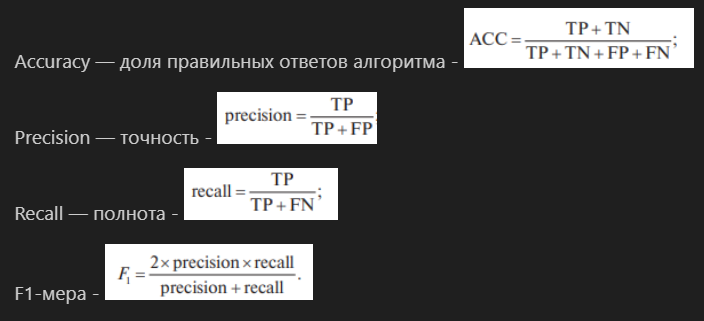



ACC = (5 + 90)/(5 + 90 + 10 + 5) = 95/110 = 0,8

Precision = 5/(5 + 10) = 5/15 = 0,33

Recall = 5/(5 + 5) = 5/10 = 0,5

F1-мера = (2 х 0,33 х 0,5)/(0,33 + 0,5) = 0,33/0,83 = 0,397

Низкая F1-мера (0,397) свидетельствует о том, что модель не очень хорошо сбалансирована в отношении точности и полноты.

**3.Допустим, есть два классификатора: первый классификатор имеет долю правильных ответов 95 %, чувствительность 99 %,
специфичность 50 %; второй классификатор имеет долю правильных ответов 87 %, чувствительность 84 %, специфичность
94 %. Что вы можете сказать о данных, используемых для классификации? Какой из этих классификаторов надежнее (при условии, что важно определение обоих классов)?**


Второй классификатор более надёжен, поскольку он имеет сбалансированные показатели чувствительности и специфичности.

**4.Перечислите возможные гиперпараметры модели логистической регрессии**




Обратная сила регуляризации, penalty(определяет тип регуляризации),
solver(алгоритм оптимизации, используемый для обучения модели)

**5.Для набора данных Cars проанализируйте веса моделей при использовании только числовых признаков. Назовите параметр,
который в наибольшей степени связан с целевой переменной.**




In [3]:
import pandas as pd
from google.colab import files
from sklearn.linear_model import LinearRegression

# 1. Загрузка данных
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

# 2. Посмотрите на названия всех колонок
print(df.columns)

# 3. Записываем имя целевой переменной
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Price(euro)'])
target = df['Price(euro)']

# 4. Разделение данных на признаки и целевую переменную
X = numeric_features
y = target

# 5. Обучение модели
model = LinearRegression()
model.fit(X, y)

# 6. Получение весов модели
weights = pd.Series(model.coef_, index=X.columns)

# 7. Параметр, который наиболее сильно связан с целевой переменной
strongest_feature = weights.abs().idxmax()

print(f"Параметр, который наиболее сильно связан с целевой переменной: {strongest_feature}")

Saving cars.csv to cars.csv
Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')
Параметр, который наиболее сильно связан с целевой переменной: Year


**6.Оцените значение функции сигмоиды σ(z) для z = 0.25**


Функции сигмоиды – это вероятность того, что аргумент функции σ(zi) принадлежит одному из классов. Такой аргумент принято
называть логит. Отметим, что для расчета функции потерь не следует пользоваться округлением до классов

σ(z) = 1 / (1 + exp(-z)) - формула

σ(z) = 1/(1 + exp(-z)) => σ(0,25) = 1/(1+ exp(-0,25)) =  0.562

**7.Оцените значение производной функции сигмоиды σ'(z) для z = –3.**


σ'(z) = σ(z) * (1 - σ(z)) - Формула производной сигмоиды

σ(-3) = 1 / (1 + exp(-(-3))) ≈ 0.047 - находим значение сигмоиды при z = -3

σ'(-3) = 0.047 * (1 - 0.047) ≈ 0.045 - подставляем полученное значение в формулу производной

Производная сигмоиды при z = -3 примерно равна 0.045

**8.Назовите, к какому классу следует отнести результат логистической модели для z = 0.1, если порог равен 0.6**


Поскольку 0.1 (вероятность) меньше 0.6 (порог), то мы относим объект к отрицательному классу.

σ(0.1) = 1 / (1 + exp(-0.1)) = 1 / (1 + 1/ (1.104)) = 1/(1 + 0,906) = 0,525


**9.Оцените значение функции потерь (бинарной кросс-энтропии) для предсказания модели y^ = 0.1 и целевой переменной y = 1.**


L = -[y * log(y^) + (1-y) * log(1-y^)] - Формула бинарной кросс-энтропии

In [4]:
import numpy as np

# Функция бинарной кросс-энтропии
def binary_cross_entropy(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Дано
y_true = 1  # Целевая переменная
y_pred = 0.1  # Предсказание модели

# Вычисление бинарной кросс-энтропии
loss = binary_cross_entropy(y_true, y_pred)
print(f"Значение бинарной кросс-энтропии: {loss}")


Значение бинарной кросс-энтропии: 2.3025850929940455
